<a href="https://colab.research.google.com/github/waqarmm/AI-Labs/blob/master/MeanShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

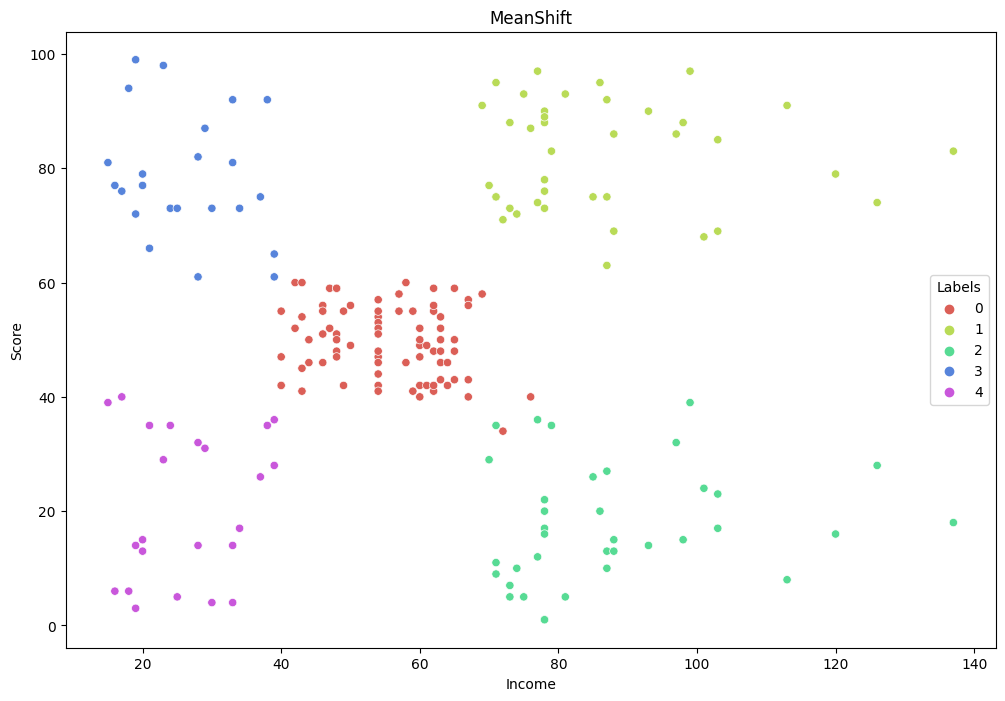

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

df = pd.read_csv('./Mall_Customers.csv')
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
'Spending Score (1-100)': 'Score'}, inplace=True)
# The following bandwidth can be automatically detected using
X = df.drop(['CustomerID', 'Gender'], axis=1)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',
palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()